# Lab 6 - Data Visualization with Seaborn

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mp

week3 = pd.read_csv("nfloffenseweek3.csv")
week4 = pd.read_csv("nfloffenseweek4.csv")
week5 = pd.read_csv("nfloffenseweek5.csv")
week6 = pd.read_csv("nfloffenseweek6.csv")
week7 = pd.read_csv("nfloffenseweek7.csv")
teams = pd.read_csv("nfl_teams.csv")

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

teams['Name'] = teams['Name'].replace(['NY Giants'], 'New York Giants')
teams['Name'] = teams['Name'].replace(['NY Jets'], 'New York Jets')
teams['Name'] = teams['Name'].replace(['Washington Football Team'], 'Washington Commanders')

teams.columns = ['ID','team','Abbreviation','Conference','Division']

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

In [12]:
week3.insert(2, "Week", 3)
week4.insert(2,"Week",4)
week5.insert(2,"Week",5)
week6.insert(2,"Week",6)
week7.insert(2,"Week",7)

#following code used from https://www.statology.org/pandas-merge-multiple-dataframes/
someDf = pd.concat([week3,week4,week5,week6,week7])

df = teams.merge(someDf, on="team")
df.columns = ['ID',"team",'Abbreviation','Conference','Division',"rank","Week","games","points_scored","total_yards","offensive_plays","yards_per_play","turnovers_lost","fumbles_lost","first_downs","passes_completed","passes_attempted","passing_yards","passing_touchdowns","passing_interceptions","net_yards_per_pass_attempt","passing_first_downs","rushing_attempts","rushing_yards","rushing_touchdowns","rushing_yards_per_attempt","rushing_first_downs","penalties","penalty_yards","first_down_penalties","percentage_scoring_drives","percentage_turnover_drives","expected_points"]
df

,ID,team,Abbreviation,Conference,Division,rank,Week,games,points_scored,total_yards,...,rushing_yards,rushing_touchdowns,rushing_yards_per_attempt,rushing_first_downs,penalties,penalty_yards,first_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points
0,1,Arizona Cardinals,ARI,NFC,West,13,3,3,62,1060,...,316,3,4.5,25,23,219,4,34.5,3.4,15.09
1,1,Arizona Cardinals,ARI,NFC,West,14,4,4,88,1398,...,448,4,4.1,33,30,280,6,36.6,4.9,8.95
2,1,Arizona Cardinals,ARI,NFC,West,18,5,5,105,1761,...,572,5,4.3,40,32,295,6,36.0,6.0,21.28
3,1,Arizona Cardinals,ARI,NFC,West,21,6,6,114,2076,...,716,5,4.4,45,38,348,6,31.1,8.2,7.27
4,1,Arizona Cardinals,ARI,NFC,West,13,7,7,156,2402,...,853,7,4.5,54,42,368,9,33.8,7.0,21.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,32,Washington Commanders,WAS,NFC,East,12,3,3,63,1026,...,260,2,3.7,18,12,128,7,23.7,13.2,-2.96
156,32,Washington Commanders,WAS,NFC,East,26,4,4,73,1323,...,402,2,4.1,24,23,264,8,21.6,13.7,-16.38
157,32,Washington Commanders,WAS,NFC,East,26,5,5,90,1708,...,445,2,3.9,28,32,335,10,22.2,12.7,-15.35
158,32,Washington Commanders,WAS,NFC,East,27,6,6,102,1922,...,573,3,4.0,35,39,371,12,23.0,10.8,-22.63


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

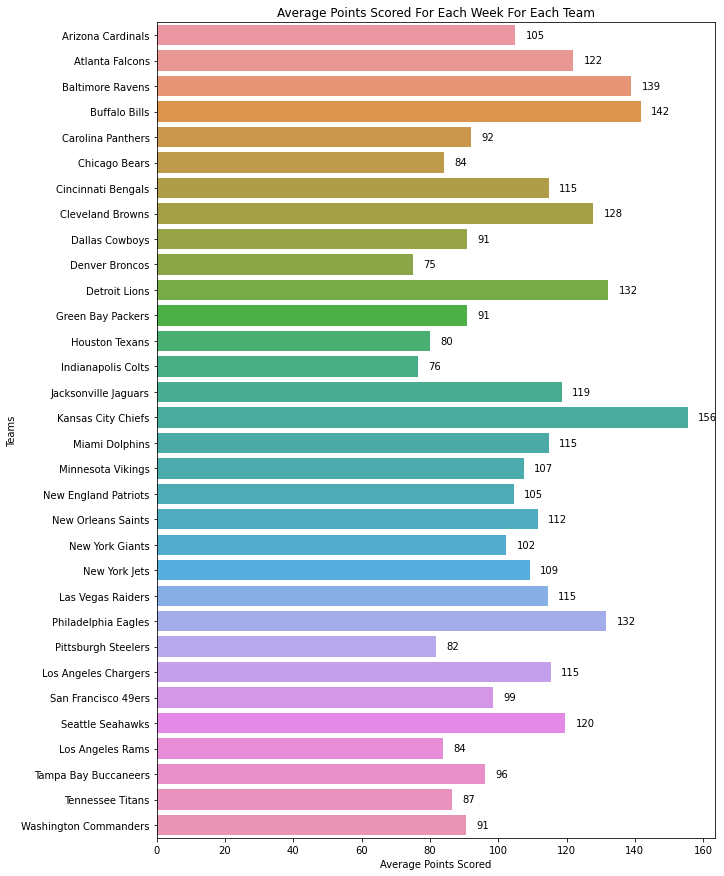

In [13]:
plt.figure(figsize=(10,15))
ax = sns.barplot(x='points_scored', y = 'team', data= df, orient='h',ci=None);
# label each bar in barplot

#following code found at https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
for p in ax.patches:
 height = p.get_height() # height of each horizontal bar is the same
 width = p.get_width() # width (average number of passengers)
 # adding text to each bar
 ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
 y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
 s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
 va = 'center') # sets vertical alignment (va) to center

plt.xlabel("Average Points Scored")
plt.ylabel("Teams")
plt.title('Average Points Scored For Each Week For Each Team');

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

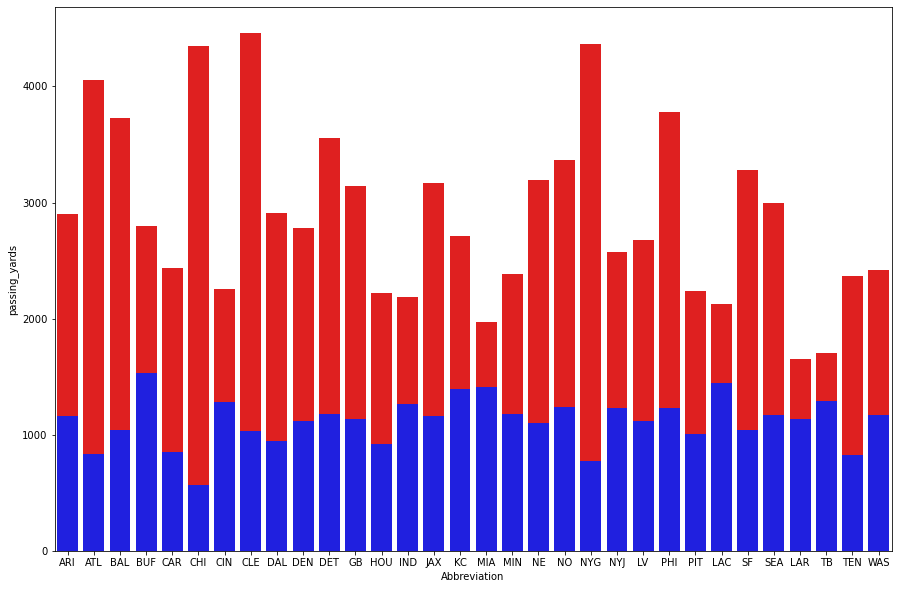

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(data = df, x = df.Abbreviation, y = df.rushing_yards, ci = False, estimator= np.sum, color = "red");
sns.barplot(data = df, x = df.Abbreviation, y = df.passing_yards, ci = False, color = "blue");
top = mp.Patch(color="red", label = "Rushing Yards")
bottom = mp.Patch(color="red", label = "Passing Yards")


4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

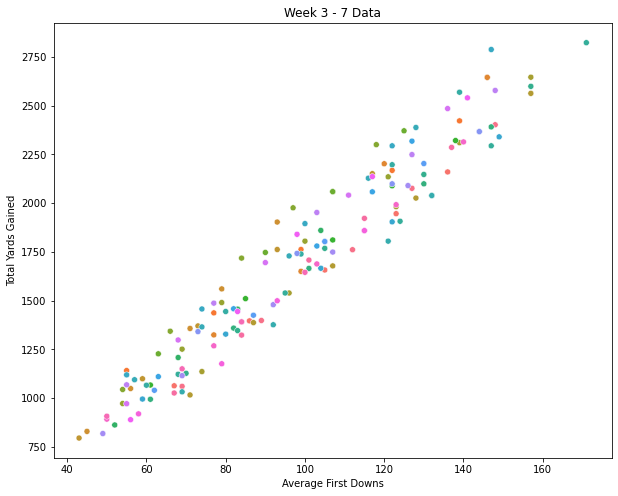

In [44]:
plt.figure(figsize=(10,8));

sns.scatterplot(x = df.first_downs,y = df.total_yards, data = df, hue=df.team, legend=False);

plt.title('Week 3 - 7 Data')
plt.xlabel('Average First Downs')
plt.ylabel('Total Yards Gained');


5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

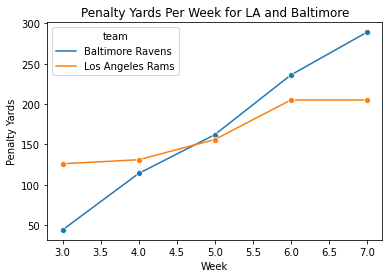

In [16]:
sns.lineplot(x = df.Week,y = df.penalty_yards, data=df, hue=df[df.team.isin(["Los Angeles Rams","Baltimore Ravens"])].team, marker = "o");
plt.ylabel("Penalty Yards")
plt.title('Penalty Yards Per Week for LA and Baltimore');


6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

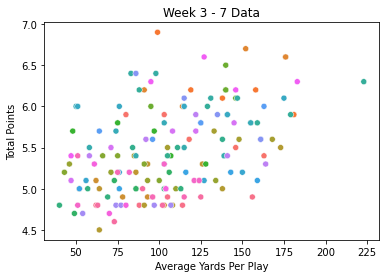

In [39]:
sns.scatterplot(x = df.points_scored , y = df.yards_per_play, data = df, hue = df.team, legend=False);

plt.title('Week 3 - 7 Data')
plt.xlabel('Average Yards Per Play')
plt.ylabel('Total Points');

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

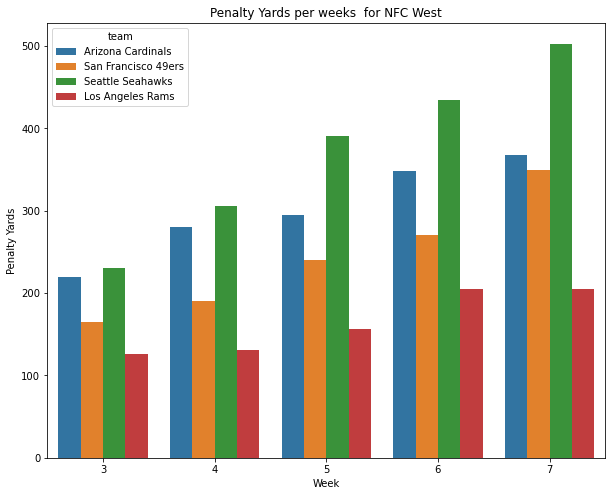

In [18]:
plt.figure(figsize=(10,8))

theWest = NFCWest = df[ (df.Division == 'West') & (df.Conference == 'NFC')]

sns.barplot(x=theWest.Week,y=theWest.penalty_yards,data=theWest, hue= theWest.team);

plt.title('Penalty Yards per weeks  for NFC West');
plt.ylabel("Penalty Yards");

8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

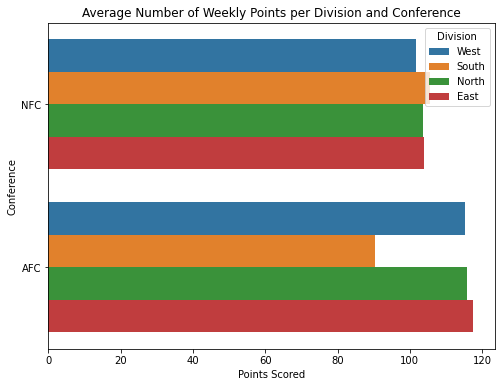

In [19]:
plt.figure(figsize=(8,6))

sns.barplot(x = df.points_scored, y = df.Conference,hue = df.Division, data = df, ci = None);

plt.title('Average Number of Weekly Points per Division and Conference')
plt.xlabel("Points Scored");